# Random Forest 

Objective(s):

This activity aims to perform classification  using Random Forest

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Random Forest.
* Demonstrate how to evaluate the performance of the model.


Resources:
* Jupyter Notebook
* loan_data

Procedure:

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and check the content of the dataframe using Pandas

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/loan_data.csv'

In [ ]:
loans= pd.read_csv(filepath)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Examine the data types. 

In [ ]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

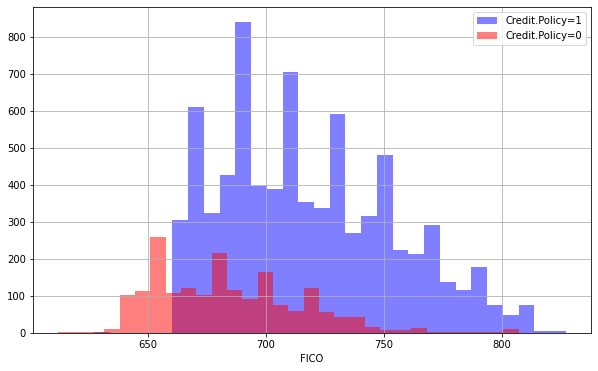

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Interpret the result of the graph

It shows the relationship between FICO scores and the lender's credit policy.
Based on the histogram, the minimum FICO to have credit policy 1 is around 660.

Create a similar figure, except this time select by the not.fully.paid column.

Text(0.5, 0, 'FICO')

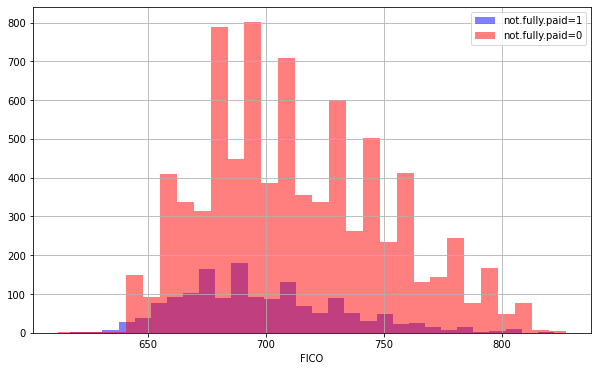

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Interpret the result of the graph

It shows the relationship between FICO scores and loan repayment such as whether there is a minimum FICO score required to avoid default or whether there are certain ranges of FICO scores that are more likely to be associated with default. This information can be useful for lenders when assessing the credit risk of potential borrowers.

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. 

<Axes: xlabel='purpose', ylabel='count'>

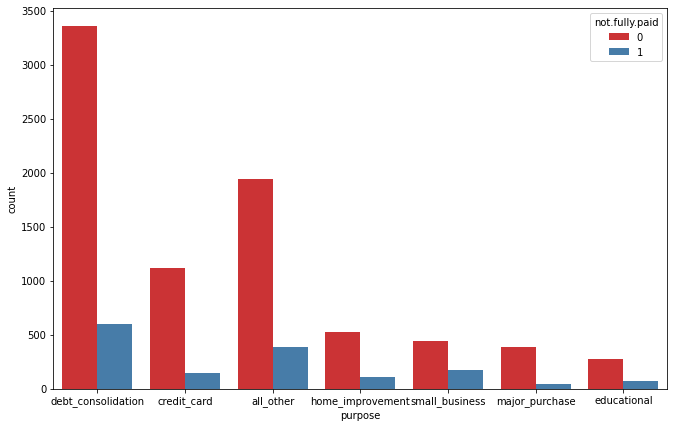

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

Interpret the result of the graph.

Based on the graph, majority of the borrowers (fully paid) are for the purpose of debt consolidation.

Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. 

<Figure size 792x504 with 0 Axes>

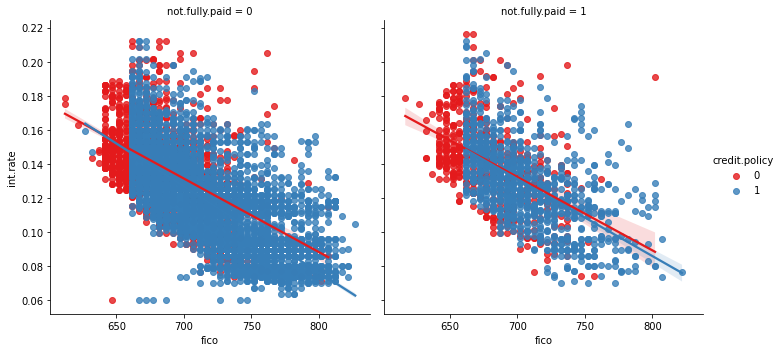

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

Interpret the result of the graph 

This plot allows us to explore the relationship between int.rate, fico, credit.policy, and not.fully.paid in a visual way. For example, we can see how int.rate increases as fico decreases, and we can also see how the relationship between int.rate and fico differs between loans that meet the credit policy criteria and loans that do not. Additionally, we can see how not.fully.paid is related to int.rate and fico for each group of loans.

The **purpose** column contains categorical value. Therefore, we need to transform the data using dummy variables. 
otice that the **purpose** column as categorical



In [ ]:
cat_feats = ['purpose']

In [ ]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Split the data into a training set and a testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Create an instance of the RandomForestClassifier class and fit it to our training data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

What is n_estimators? 

n_estimators is a parameter used in the random forest algorithm in machine learning. It refers to the number of decision trees that will be used in the random forest.

Random forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. Each decision tree is trained on a random subset of the training data, and the final prediction is made by aggregating the predictions of all the trees. By combining multiple decision trees in this way, random forest can often achieve higher accuracy and reduce overfitting compared to using a single decision tree.

The n_estimators parameter controls the number of decision trees that will be used in the random forest. Increasing n_estimators can often improve the accuracy of the model, but at the cost of increased computational complexity and longer training times. The optimal value of n_estimators depends on the specific dataset and problem at hand, and it may require some experimentation to determine the best value.

Predict the class of not.fully.paid for the X_test data.

In [ ]:
predictions = rfc.predict(X_test)

Create a classification report from the results

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



Show the Confusion Matrix for the predictions.

In [ ]:
print(confusion_matrix(y_test,predictions))

[[2422    9]
 [ 434    9]]


In [ ]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.8458594293667363


In [ ]:
print(roc_auc_score(y_test, predictions))

0.5083069234576338


Interpret the result of the classification error, confusion matrix , accuracy score and roc_auc_score

Based on the given classification report, confusion matrix, accuracy score, and ROC AUC score, the model is not performing well. The precision for the positive class (class 1) is low, indicating that the model is not correctly identifying many positive cases. The recall for the positive class is also very low, meaning that the model is not able to identify many of the actual positive cases. The ROC AUC score is close to 0.5, which indicates that the model is not performing better than random chance. Overall, this suggests that the model may need to be improved or a different approach may need to be taken to effectively classify the data.

# Supplementary Activity:
* Choose your own dataset 
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization 
* Build the model using Ranfom Forest
* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
* Change the n_estimators from 100 to 1000, increment by 100. 
* Create a graph to compare the accuracy based from n_estimators

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [ ]:
fp= '/content/drive/My Drive/Colab Notebooks/Datasets/Iris_Data.csv'

In [ ]:
df= pd.read_csv(fp)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# number of datapoints and columns in the DataFrame
print("Number of datapoints: {}".format(len(df)))
print("Number of columns: {}".format(len(df.columns)))

# Print the data types of each column
print("\nData types:")
print(df.dtypes)


Number of datapoints: 150
Number of columns: 5

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
# Select only the numeric columns
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
numeric_df = df[numeric_cols]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Text(0, 0.5, 'Density')

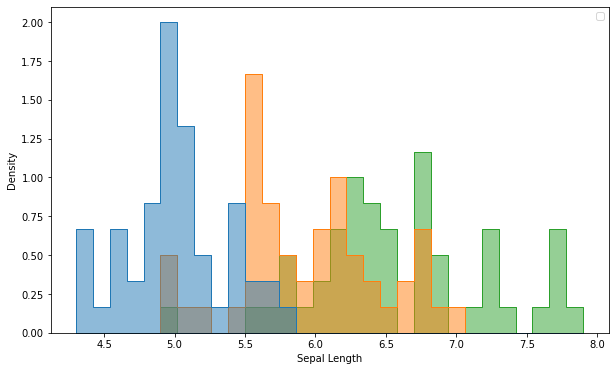

In [ ]:
# Set figure size
plt.figure(figsize=(10,6))

# Plot FICO score histogram for each credit policy status
sns.histplot(data=df, x='sepal_length', hue='species', 
             alpha=0.5, bins=30, 
             stat='density', common_norm=False, 
             element='step', fill=True)

# Add legend and axis labels
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

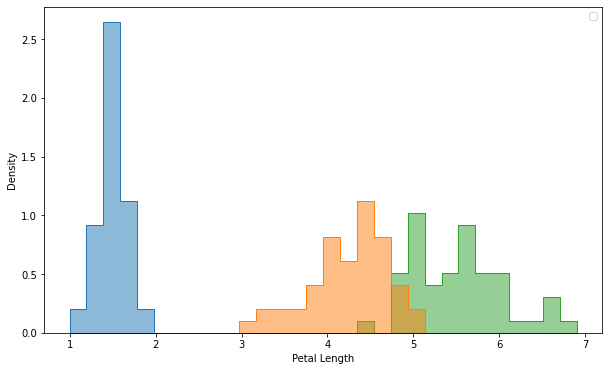

In [ ]:
# Set figure size
plt.figure(figsize=(10,6))

# Plot petal length histogram for each species
sns.histplot(data=df, x='petal_length', hue='species', 
             alpha=0.5, bins=30, 
             stat='density', common_norm=False, 
             element='step', fill=True)

# Add legend and axis labels
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Density')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Set X and y variables
X = df.drop('species', axis=1)
y = df['species']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Create random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
predictions = rfc.predict(X_test)

# Evaluate the performance of the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('ROC AUC score:', roc_auc_score(y_test, rfc.predict_proba(X_test), multi_class='ovo'))
print('Accuracy:', accuracy_score(y_test, predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

ROC AUC score: 0.9934294871794872
Accuracy: 0.9555555555555556


Conclusion

The random forest classifier trained on the Iris dataset has performed well, with an overall accuracy of 0.96 and good precision, recall, and F1-score for each class. The model has also demonstrated good discriminatory power between the classes, as indicated by the ROC AUC score of 0.993. These results suggest that the model is capable of accurately classifying the species of iris based on the given features.